#Cell Line Sorting Tool for highest and lowest Coexpression: 3 Genes of Interest

Purpose: Allow to select cell lines with the highest and lowest coexpressions of 3 genes of interest.


- DepMap Portal Datasets from Broad Institute (Free source)
- Current DepMap Release data, including CRISPR Screens, PRISM Drug Screens, Copy Number, Mutation, Expression, and Fusions
DepMap, Broad (2024). DepMap 24Q4 Public. Figshare+. Dataset. https://doi.org/10.25452/figshare.plus.27993248.v1
- Tsherniak A, Vazquez F, Montgomery PG, Weir BA, Kryukov G, Cowley GS, Gill S, Harrington WF, Pantel S, Krill-Burger JM, Meyers RM, Ali L, Goodale A, Lee Y, Jiang G, Hsiao J, Gerath WFJ, Howell S, Merkel E, Ghandi M, Garraway LA, Root DE, Golub TR, Boehm JS, Hahn WC. Defining a Cancer Dependency Map. Cell. 2017 Jul 27;170(3):564-576.

##Libraries

In [ ]:
!pip install klib

In [ ]:
import pandas as pd
import klib

##Upload Dataset(s)

In [ ]:
metadata = pd.read_csv('/content/sample_info.csv')
coding_gene = pd.read_csv('/content/OmicsExpressionProteinCodingGenesTPMLogp1.csv')

##Data Wrangling / Pre-processing

###Coding Genes

In [ ]:
# Rename the first column to DepMap_ID
coding_gene.rename(columns={coding_gene.columns[0]: 'DepMap_ID'}, inplace=True)

# Visualize Original Table
coding_gene.head()

,DepMap_ID,TSPAN6 (7105),TNMD (64102),DPM1 (8813),SCYL3 (57147),C1orf112 (55732),FGR (2268),CFH (3075),FUCA2 (2519),GCLC (2729),...,H3C2 (8358),H3C3 (8352),AC098582.1 (8916),DUS4L-BCAP29 (115253422),C8orf44-SGK3 (100533105),ELOA3B (728929),NPBWR1 (2831),ELOA3D (100506888),ELOA3 (162699),CDR1 (1038)
0,ACH-001113,4.331992,0.000000,7.364660,2.792855,4.471187,0.028569,1.226509,3.044394,6.500005,...,2.689299,0.189034,0.201634,2.130931,0.555816,0.0,0.275007,0.0,0.0,0.000000
1,ACH-001289,4.567424,0.584963,7.106641,2.543496,3.504620,0.000000,0.189034,3.813525,4.221877,...,1.286881,1.049631,0.321928,1.464668,0.632268,0.0,0.014355,0.0,0.0,0.000000
2,ACH-001339,3.150560,0.000000,7.379118,2.333424,4.228049,0.056584,1.310340,6.687201,3.682573,...,0.594549,1.097611,0.831877,2.946731,0.475085,0.0,0.084064,0.0,0.0,0.042644
3,ACH-001979,4.240314,0.000000,5.681168,2.063503,1.641546,0.000000,7.236301,5.948367,4.596935,...,0.000000,0.000000,0.847997,1.887525,0.176323,0.0,0.000000,0.0,0.0,0.000000
4,ACH-002438,4.032101,0.000000,6.674687,2.117695,3.003602,0.000000,2.169925,6.838195,3.253989,...,0.238787,0.378512,0.584963,1.748461,0.839960,0.0,0.014355,0.0,0.0,0.042644


**Gene Coding Dataset Description** \
\
Gene expression TPM values of the protein coding genes for DepMap cell lines.

Values are inferred from RNA-seq data using RSEM (unstranded mode), and are reported after log2 transformation, using a pseudo-count of 1; log2(TPM+1).

In [ ]:
klib.missingval_plot(coding_gene)

No missing values found in the dataset.


In [ ]:
# Get a list of all coding_gene column names
columns = coding_gene.columns.tolist()

# Use list comprehension to find the exact column names
target_genes = [gene for gene in columns if gene.startswith('TSPAN6 ') or
                                          gene.startswith('TNMD ') or
                                          gene.startswith('DPM1 ')]

# Make sure DepMap_ID is included
target_columns = ['DepMap_ID'] + target_genes

# Subset the coding_gene dataframe
f_coding_gene= coding_gene[target_columns]

# Preview
print(f_coding_gene.head())

    DepMap_ID  TSPAN6 (7105)  TNMD (64102)  DPM1 (8813)
0  ACH-001113       4.331992      0.000000     7.364660
1  ACH-001289       4.567424      0.584963     7.106641
2  ACH-001339       3.150560      0.000000     7.379118
3  ACH-001979       4.240314      0.000000     5.681168
4  ACH-002438       4.032101      0.000000     6.674687


###Cell Line Metadata

In [ ]:
# Visualize Original Table
metadata.head()

,DepMap_ID,cell_line_name,stripped_cell_line_name,CCLE_Name,alias,COSMICID,sex,source,RRID,WTSI_Master_Cell_ID,...,lineage_sub_subtype,lineage_molecular_subtype,default_growth_pattern,model_manipulation,model_manipulation_details,patient_id,parent_depmap_id,Cellosaurus_NCIt_disease,Cellosaurus_NCIt_id,Cellosaurus_issues
0,ACH-000016,SLR 21,SLR21,SLR21_KIDNEY,NaN,NaN,NaN,Academic lab,CVCL_V607,NaN,...,NaN,NaN,NaN,NaN,NaN,PT-JnARLB,NaN,Clear cell renal cell carcinoma,C4033,NaN
1,ACH-000032,MHH-CALL-3,MHHCALL3,MHHCALL3_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,NaN,Female,DSMZ,CVCL_0089,NaN,...,b_cell,NaN,NaN,NaN,NaN,PT-p2KOyI,NaN,Childhood B acute lymphoblastic leukemia,C9140,NaN
2,ACH-000033,NCI-H1819,NCIH1819,NCIH1819_LUNG,NaN,NaN,Female,Academic lab,CVCL_1497,NaN,...,NSCLC_adenocarcinoma,NaN,NaN,NaN,NaN,PT-9p1WQv,NaN,Lung adenocarcinoma,C3512,NaN
3,ACH-000043,Hs 895.T,HS895T,HS895T_FIBROBLAST,NaN,NaN,Female,ATCC,CVCL_0993,NaN,...,NaN,NaN,2D: adherent,NaN,NaN,PT-rTUVZQ,NaN,Melanoma,C3224,NaN
4,ACH-000049,HEK TE,HEKTE,HEKTE_KIDNEY,NaN,NaN,NaN,Academic lab,CVCL_WS59,NaN,...,NaN,NaN,NaN,immortalized,NaN,PT-qWYYgr,NaN,NaN,NaN,No information is available about this cell li...


**Metadata Dataset Description**

Metadata for all of DepMap’s cancer models/cell lines. A full description of each column is available in the DepMap Release README file.

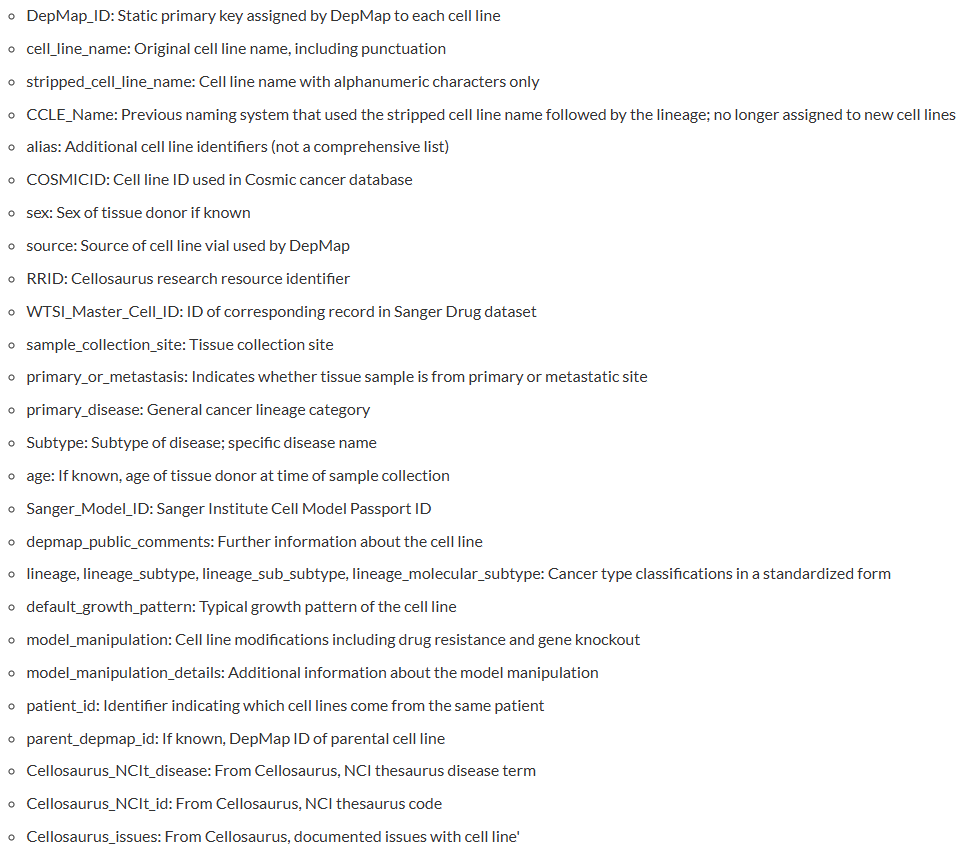

In [ ]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1840 entries, 0 to 1839
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DepMap_ID                   1840 non-null   object 
 1   cell_line_name              1748 non-null   object 
 2   stripped_cell_line_name     1839 non-null   object 
 3   CCLE_Name                   1836 non-null   object 
 4   alias                       113 non-null    object 
 5   COSMICID                    981 non-null    float64
 6   sex                         1738 non-null   object 
 7   source                      1793 non-null   object 
 8   RRID                        1818 non-null   object 
 9   WTSI_Master_Cell_ID         980 non-null    float64
 10  sample_collection_site      1833 non-null   object 
 11  primary_or_metastasis       1198 non-null   object 
 12  primary_disease             1840 non-null   object 
 13  Subtype                     1696 

In [ ]:
# Only Keep Relevant Attributes
f_metadata = metadata[['DepMap_ID', 'stripped_cell_line_name',
                     'sample_collection_site','primary_disease', 'Subtype']]
metadata.head()

,DepMap_ID,cell_line_name,stripped_cell_line_name,CCLE_Name,alias,COSMICID,sex,source,RRID,WTSI_Master_Cell_ID,...,lineage_sub_subtype,lineage_molecular_subtype,default_growth_pattern,model_manipulation,model_manipulation_details,patient_id,parent_depmap_id,Cellosaurus_NCIt_disease,Cellosaurus_NCIt_id,Cellosaurus_issues
0,ACH-000016,SLR 21,SLR21,SLR21_KIDNEY,NaN,NaN,NaN,Academic lab,CVCL_V607,NaN,...,NaN,NaN,NaN,NaN,NaN,PT-JnARLB,NaN,Clear cell renal cell carcinoma,C4033,NaN
1,ACH-000032,MHH-CALL-3,MHHCALL3,MHHCALL3_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,NaN,Female,DSMZ,CVCL_0089,NaN,...,b_cell,NaN,NaN,NaN,NaN,PT-p2KOyI,NaN,Childhood B acute lymphoblastic leukemia,C9140,NaN
2,ACH-000033,NCI-H1819,NCIH1819,NCIH1819_LUNG,NaN,NaN,Female,Academic lab,CVCL_1497,NaN,...,NSCLC_adenocarcinoma,NaN,NaN,NaN,NaN,PT-9p1WQv,NaN,Lung adenocarcinoma,C3512,NaN
3,ACH-000043,Hs 895.T,HS895T,HS895T_FIBROBLAST,NaN,NaN,Female,ATCC,CVCL_0993,NaN,...,NaN,NaN,2D: adherent,NaN,NaN,PT-rTUVZQ,NaN,Melanoma,C3224,NaN
4,ACH-000049,HEK TE,HEKTE,HEKTE_KIDNEY,NaN,NaN,NaN,Academic lab,CVCL_WS59,NaN,...,NaN,NaN,NaN,immortalized,NaN,PT-qWYYgr,NaN,NaN,NaN,No information is available about this cell li...


GridSpec(6, 6)

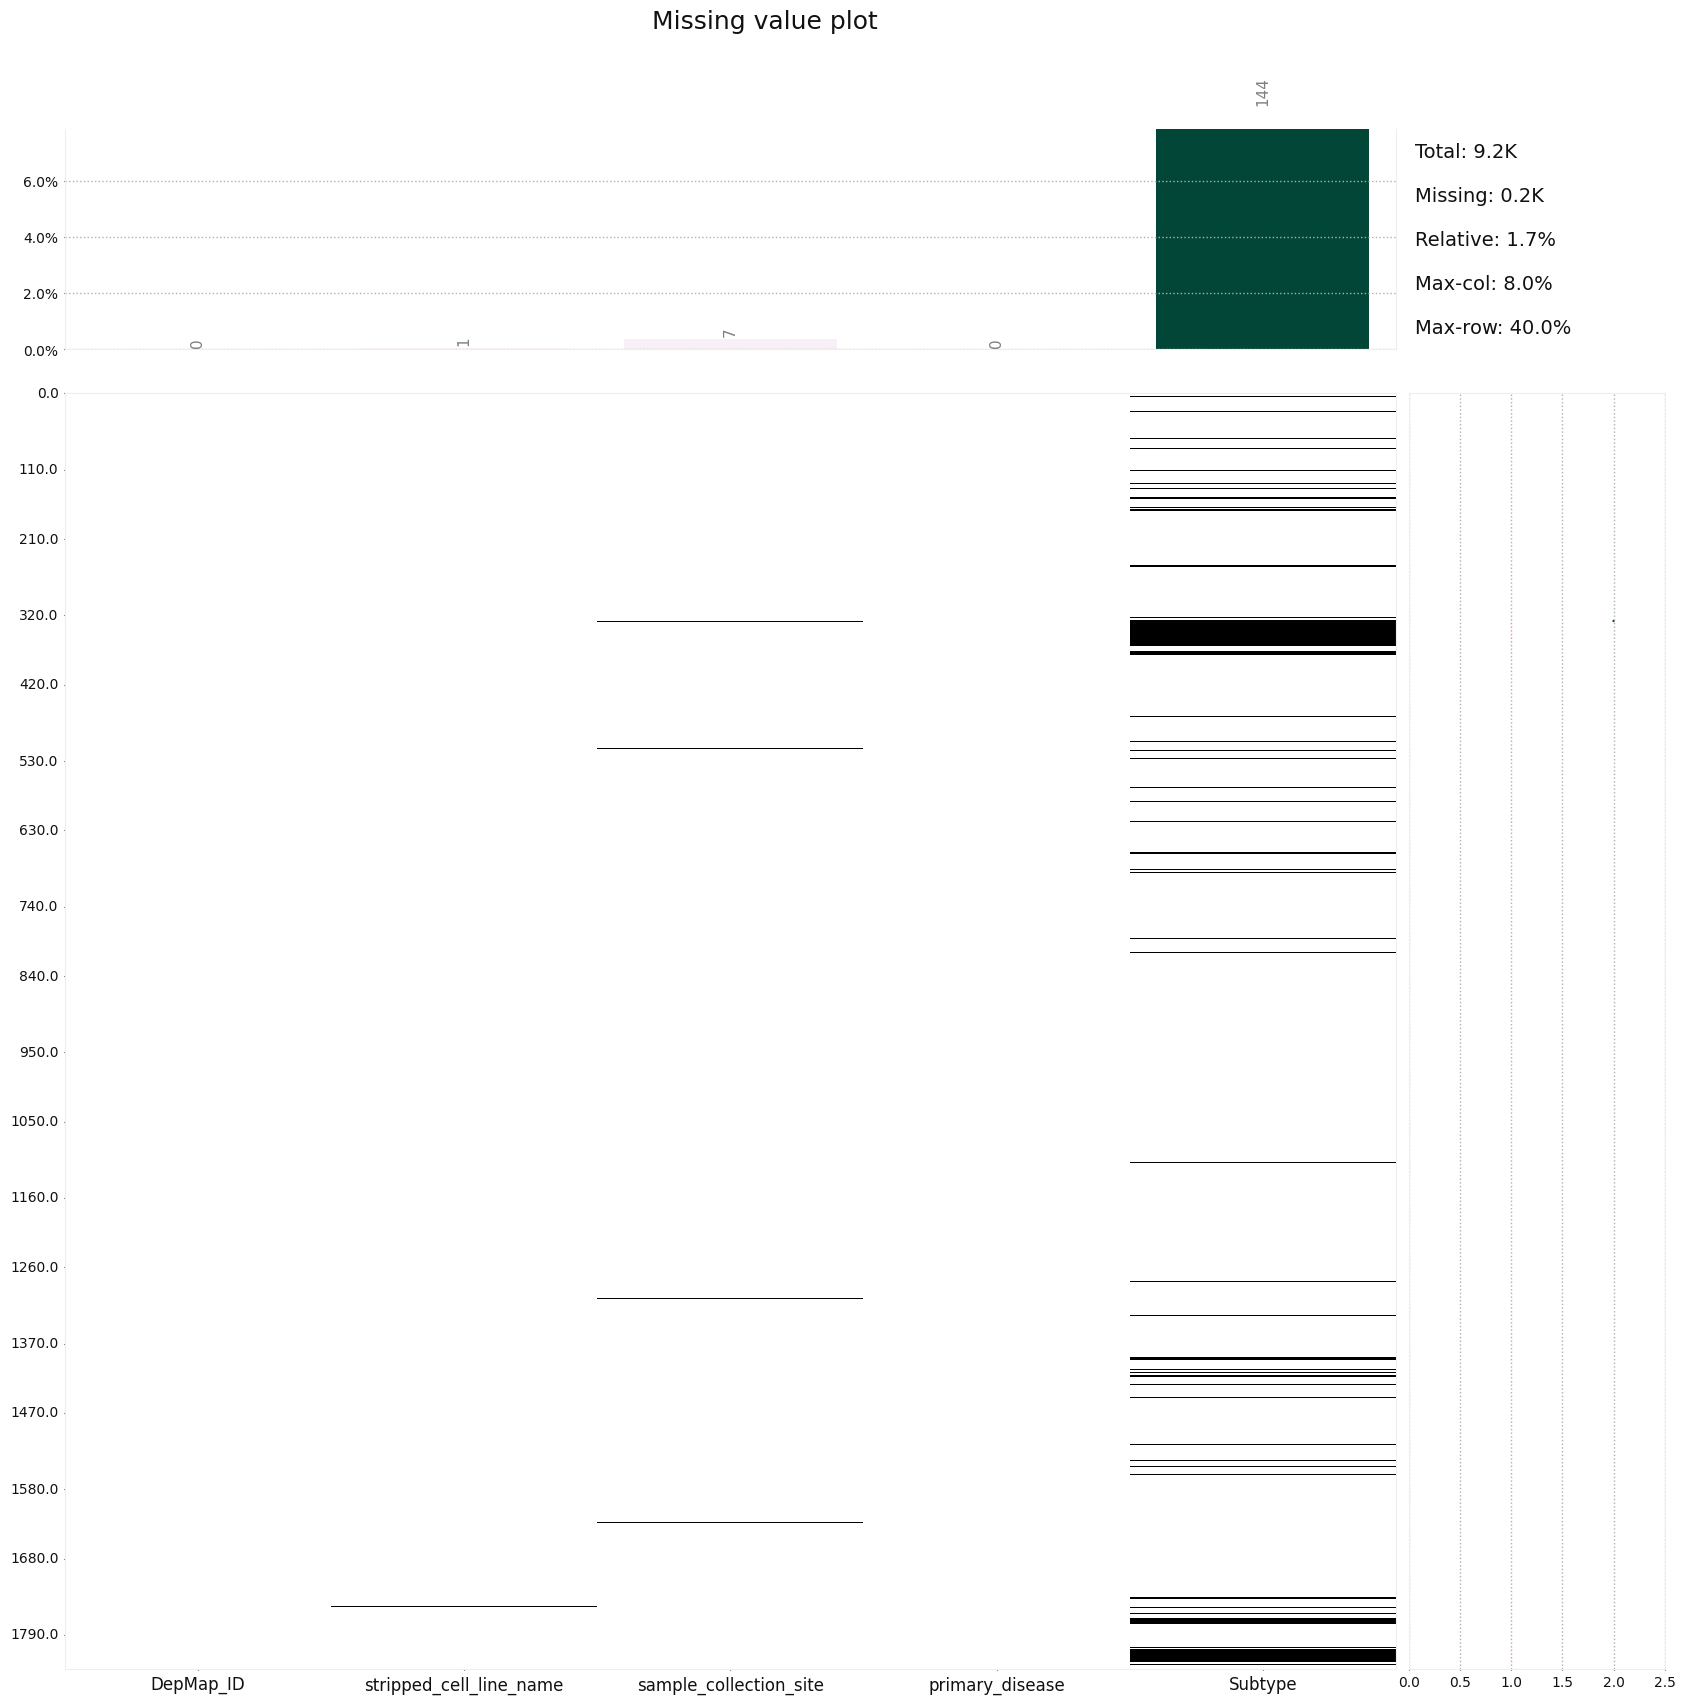

In [ ]:
# Visualize Missing Data
klib.missingval_plot(f_metadata)

##Combine Metadata and Coding Genes

In [ ]:
# Merge on DepMap_ID
combined_df = pd.merge(f_metadata, f_coding_gene, on='DepMap_ID', how='inner')

# Preview the merged dataframe
combined_df.head()

,DepMap_ID,stripped_cell_line_name,sample_collection_site,primary_disease,Subtype,TSPAN6 (7105),TNMD (64102),DPM1 (8813)
0,ACH-000016,SLR21,kidney,Kidney Cancer,Renal Cell Carcinoma,4.190615,0.0,6.126808
1,ACH-000032,MHHCALL3,bone_marrow,Leukemia,"Acute Lymphoblastic Leukemia (ALL), B-cell",0.070389,0.0,5.884354
2,ACH-000033,NCIH1819,lymph_node,Lung Cancer,"Non-Small Cell Lung Cancer (NSCLC), Adenocarci...",4.683135,0.0,6.949418
3,ACH-000043,HS895T,fibroblast,Non-Cancerous,Skin,3.500802,0.0,6.612942
4,ACH-000049,HEKTE,kidney,Non-Cancerous,NaN,4.263034,0.0,6.537451


In [ ]:
# Check shape (rows, columns)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427 entries, 0 to 1426
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DepMap_ID                1427 non-null   object 
 1   stripped_cell_line_name  1427 non-null   object 
 2   sample_collection_site   1423 non-null   object 
 3   primary_disease          1427 non-null   object 
 4   Subtype                  1369 non-null   object 
 5   TSPAN6 (7105)            1427 non-null   float64
 6   TNMD (64102)             1427 non-null   float64
 7   DPM1 (8813)              1427 non-null   float64
dtypes: float64(3), object(5)
memory usage: 89.3+ KB


GridSpec(6, 6)

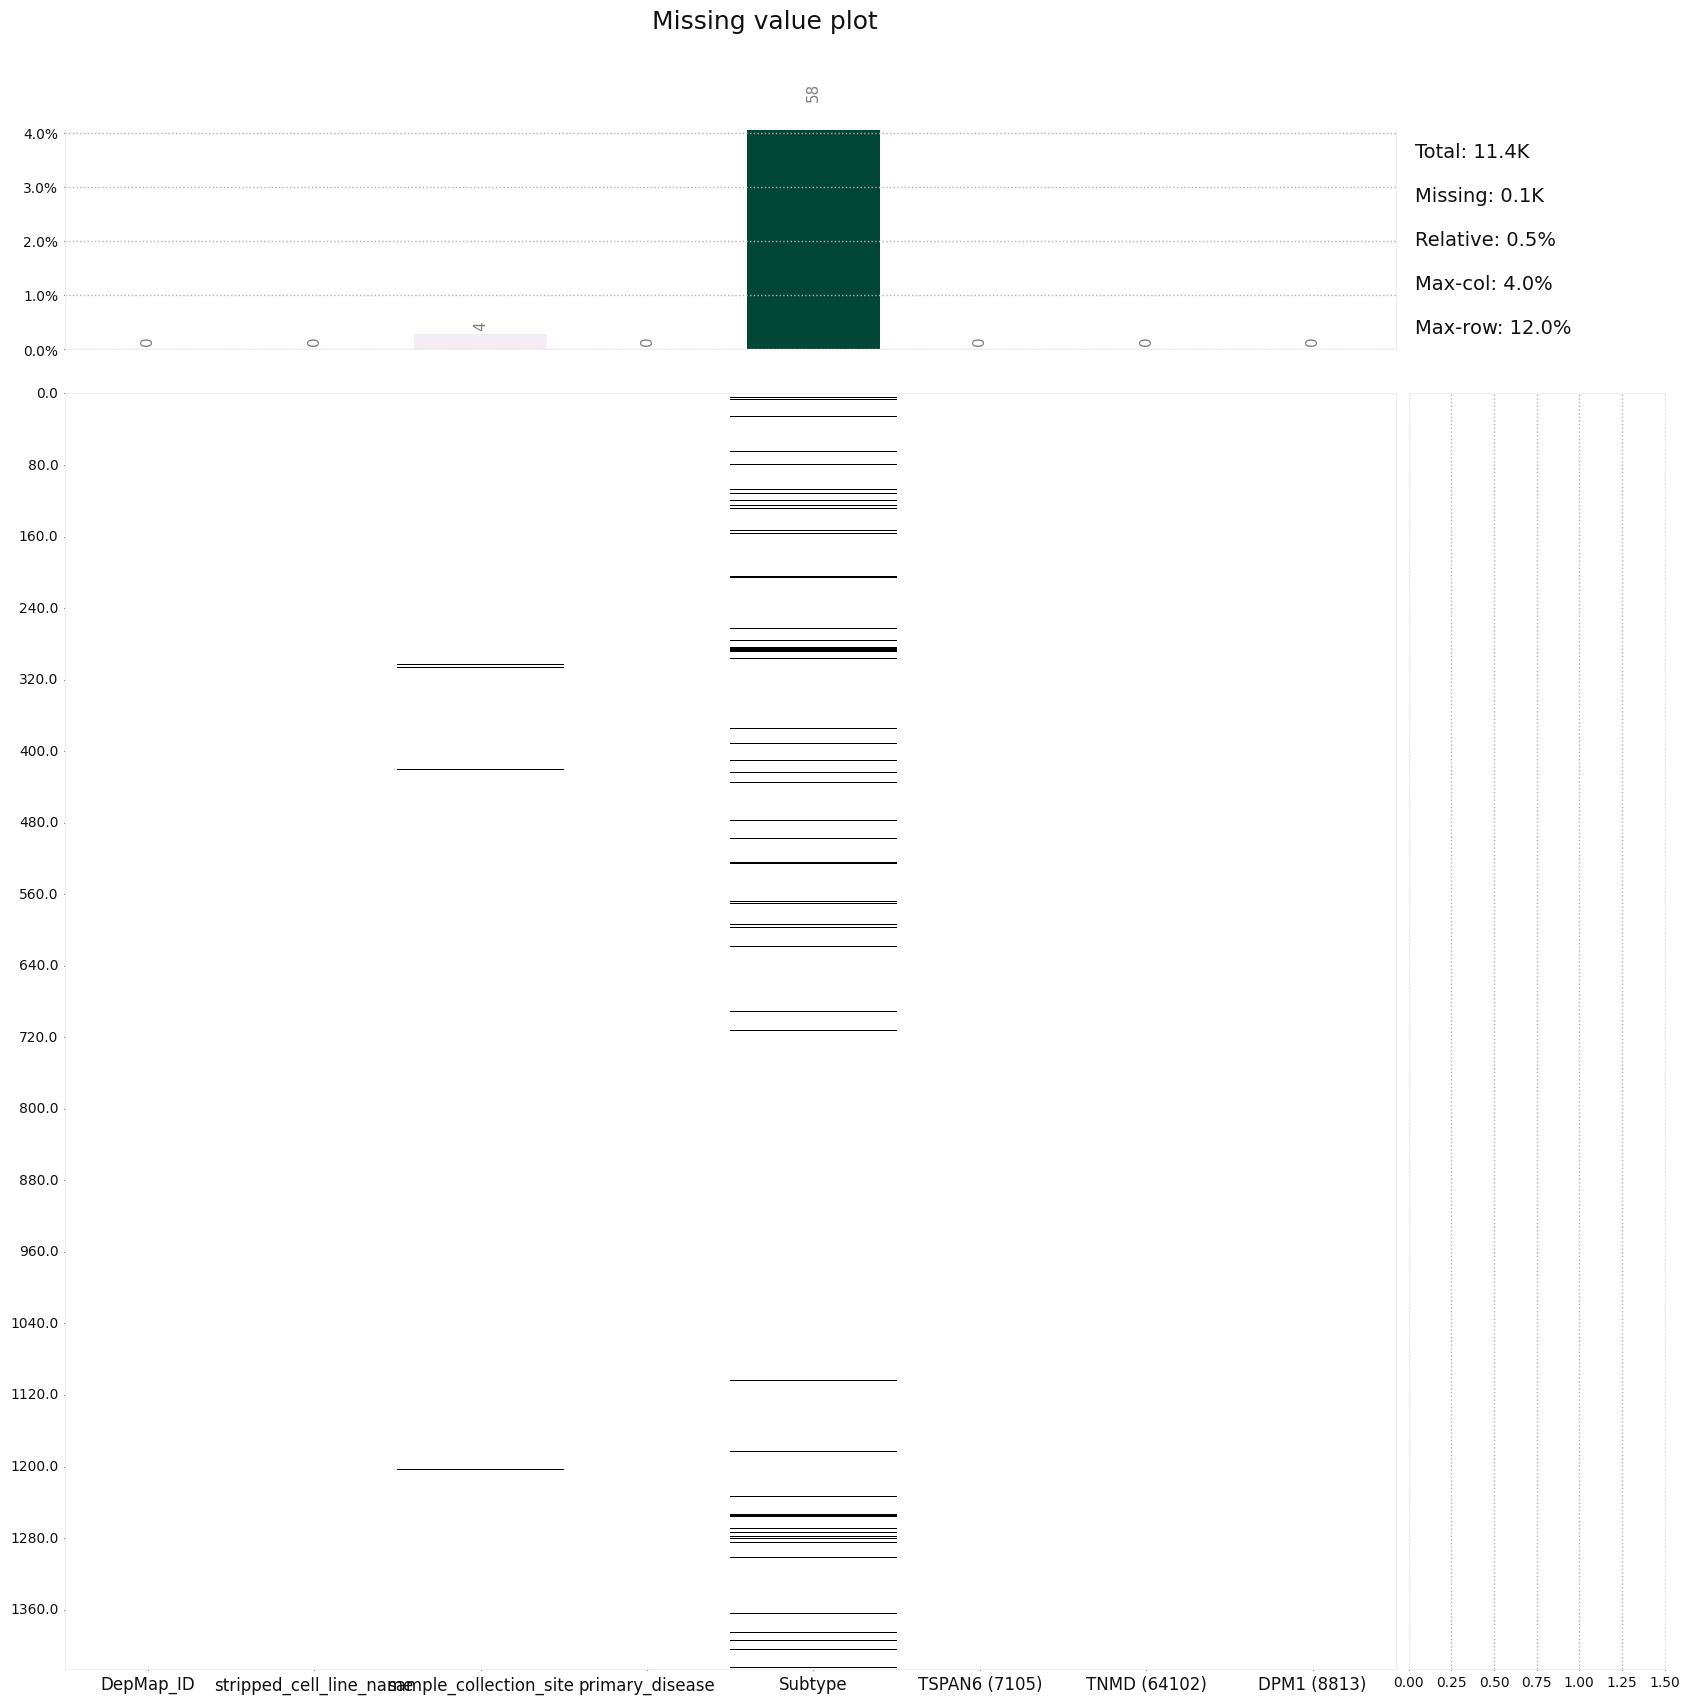

In [ ]:
# Visualize Missing Data
klib.missingval_plot(combined_df)

## Sort Cell Lines with Highest Expression

In [ ]:
# Identify the exact column names (as extracted earlier)
gene_cols = [col for col in combined_df.columns if col.startswith('TSPAN6 ') or
                                               col.startswith('TNMD ') or
                                               col.startswith('DPM1 ')]


# Compute median for each gene (optional)
gene_medians = combined_df[gene_cols].median()


# Filter rows where all 3 gene expressions are above a threshold
threshold = 1
high_expr_df = combined_df[
    (combined_df[gene_cols[0]] > threshold) &
    (combined_df[gene_cols[1]] > threshold) &
    (combined_df[gene_cols[2]] > threshold)
].copy()

# Sort by sum of the 3 gene expressions (optional)
high_expr_df['total_expression'] = high_expr_df[gene_cols].sum(axis=1)
high_expr_df = high_expr_df.sort_values(by='total_expression', ascending=False)

# Show top results
print(high_expr_df[['DepMap_ID', 'stripped_cell_line_name',
                    'sample_collection_site','primary_disease', 'Subtype'] + gene_cols].head())

       DepMap_ID stripped_cell_line_name sample_collection_site  \
102   ACH-000909                  JHUEM2            endometrium   
1362  ACH-001578                   NCCIT                   lung   
401   ACH-000109                NCIH3255                   lung   
1327  ACH-001460                     C84        large_intestine   
1325  ACH-001458                     C75        large_intestine   

                 primary_disease  \
102   Endometrial/Uterine Cancer   
1362            Embryonal Cancer   
401                  Lung Cancer   
1327     Colon/Colorectal Cancer   
1325     Colon/Colorectal Cancer   

                                                Subtype  TSPAN6 (7105)  \
102                          Endometrial Adenocarcinoma       5.847746   
1362                                          Carcinoma       6.345361   
401   Non-Small Cell Lung Cancer (NSCLC), Adenocarci...       8.132680   
1327                                     Adenocarcinoma       5.344473   
1325      

In [ ]:
# Show 20 highest coexpressing cell lines
high_expr_df.head(20)

,DepMap_ID,stripped_cell_line_name,sample_collection_site,primary_disease,Subtype,TSPAN6 (7105),TNMD (64102),DPM1 (8813),total_expression
102,ACH-000909,JHUEM2,endometrium,Endometrial/Uterine Cancer,Endometrial Adenocarcinoma,5.847746,5.251340,6.016808,17.115895
1362,ACH-001578,NCCIT,lung,Embryonal Cancer,Carcinoma,6.345361,3.401903,7.211694,16.958958
401,ACH-000109,NCIH3255,lung,Lung Cancer,"Non-Small Cell Lung Cancer (NSCLC), Adenocarci...",8.132680,1.613532,6.636045,16.382256
1327,ACH-001460,C84,large_intestine,Colon/Colorectal Cancer,Adenocarcinoma,5.344473,3.007196,7.285587,15.637256
1325,ACH-001458,C75,large_intestine,Colon/Colorectal Cancer,Adenocarcinoma,6.332529,2.094236,6.812113,15.238878
1426,ACH-002291,NTERA2CLD1,lung,Embryonal Cancer,Carcinoma,5.860218,2.321928,7.008653,15.190799
51,ACH-000333,JHOM2B,ovary,Ovarian Cancer,"Adenocarcinoma, mucinous",5.385431,2.648465,7.016920,15.050816
878,ACH-000657,A2780,ovary,Ovarian Cancer,"Adenocarcinoma, endometrioid",5.826294,1.929791,6.944507,14.700592
1247,ACH-001277,YAMATO,soft_tissue,Sarcoma,Synovial,5.339850,2.344828,6.989025,14.673704
1328,ACH-001461,C99,large_intestine,Colon/Colorectal Cancer,Adenocarcinoma,5.475409,2.963474,6.015025,14.453908


## Sort Cell Line Categories and Cell Lines with Lowest Expression

In [ ]:
# Identify the exact column names (as extracted earlier)
gene_cols = [col for col in combined_df.columns if col.startswith('TSPAN6 ') or
                                               col.startswith('TNMD ') or
                                               col.startswith('DPM1 ')]

# Compute median for each gene (Optional)
gene_medians = combined_df[gene_cols].median()


# Filter rows where all 3 gene expressions are below a threshold
threshold = 4
low_expr_df = combined_df[
    (combined_df[gene_cols[0]] < threshold) &
    (combined_df[gene_cols[1]] < threshold) &
    (combined_df[gene_cols[2]] < threshold)
].copy()

# Sort by sum of the 3 gene expressions (optional)
low_expr_df['total_expression'] = low_expr_df[gene_cols].sum(axis=1)
low_expr_df = low_expr_df.sort_values(by='total_expression', ascending=True)

# Show top results
print(low_expr_df[['DepMap_ID', 'stripped_cell_line_name',
                   'sample_collection_site','primary_disease', 'Subtype'] + gene_cols].head())

       DepMap_ID stripped_cell_line_name              sample_collection_site  \
107   ACH-001100                    KHYG  haematopoietic_and_lymphoid_tissue   
1302  ACH-001400                   SW954                              cervix   

      primary_disease                  Subtype  TSPAN6 (7105)  TNMD (64102)  \
107          Lymphoma                      NaN       0.000000           0.0   
1302  Cervical Cancer  Squamous Cell Carcinoma       2.134221           0.0   

      DPM1 (8813)  
107      3.655352  
1302     3.894333  


In [ ]:
# Show 20 lowest coexpressing cell lines
low_expr_df.head(20)

,DepMap_ID,stripped_cell_line_name,sample_collection_site,primary_disease,Subtype,TSPAN6 (7105),TNMD (64102),DPM1 (8813),total_expression
107,ACH-001100,KHYG,haematopoietic_and_lymphoid_tissue,Lymphoma,NaN,0.000000,0.0,3.655352,3.655352
1302,ACH-001400,SW954,cervix,Cervical Cancer,Squamous Cell Carcinoma,2.134221,0.0,3.894333,6.028554
